In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import math

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager
import datetime as dt
sns.set_style("darkgrid")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def prettify_plot(plot_func, title):
    ax = plt.subplot(111)
    plot_func(ax)
    ax.legend(bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0., fontsize=18)
    _ = ax.set_title(title, fontsize=20)

# Monthly

## Running experiment

In [25]:
%%bash
./EvolvingPRLargeNetworkMonthly.scala

Loading nodes...
Loading edges...
Selecting subgraph Kraj Vysocina
Number of vertices: 152810
Number of edges: 37086
Running PageRank algorithm...
PageRank finished in 403.803 seconds.
Running evolving PageRank algorithm (1/(t*t))...
PageRank finished in 457.65 seconds.
Running evolving PageRank algorithm (1/t)...
PageRank finished in 472.22 seconds.


In [3]:
raw_data = [json.loads(row) for row in open("./data/evolving_pagerank_large_graph_monthly_experiment.jsonline")]
index = np.array(map(lambda row: row["stringId"], raw_data))
node_types = np.array(map(lambda row: row["nodeType"], raw_data))

In [4]:
top_creditors = [u"gemoneybank", u"providentfinancial", u"českáspořitelna", u"proficreditczech", u"všeobecnázdravotnípojišťovnačeskérepubliky", u"ab4bv", 
                 u"o2czechrepublic", u"cetelemčr", u"essox", u"t-mobileczechrepublic", u"čezprodej", u"ab5bv", u"homecredit", u"bohemiafaktoring", 
                 u"československáobchodníbanka", u"komerčníbanka", u"jetmoney", u"kooperativapojišťovnaasviennainsurancegroup", u"smartcapital", u"monetamoneybank"]

## Static PR

In [5]:
static_pr_df = pd.DataFrame(map(lambda row: dict(row["pr"]), raw_data), index=index)
static_pr_df.columns = map(lambda date_id: dt.date(date_id // 100, date_id % 100, 1), static_pr_df.columns)
static_pr_df.shape

(5449, 120)

In [6]:
static_pr_df = static_pr_df.drop(static_pr_df.columns[-1], axis=1)

In [7]:
# static_pr_df.sum() # in all time windows it should be equal to 1.0

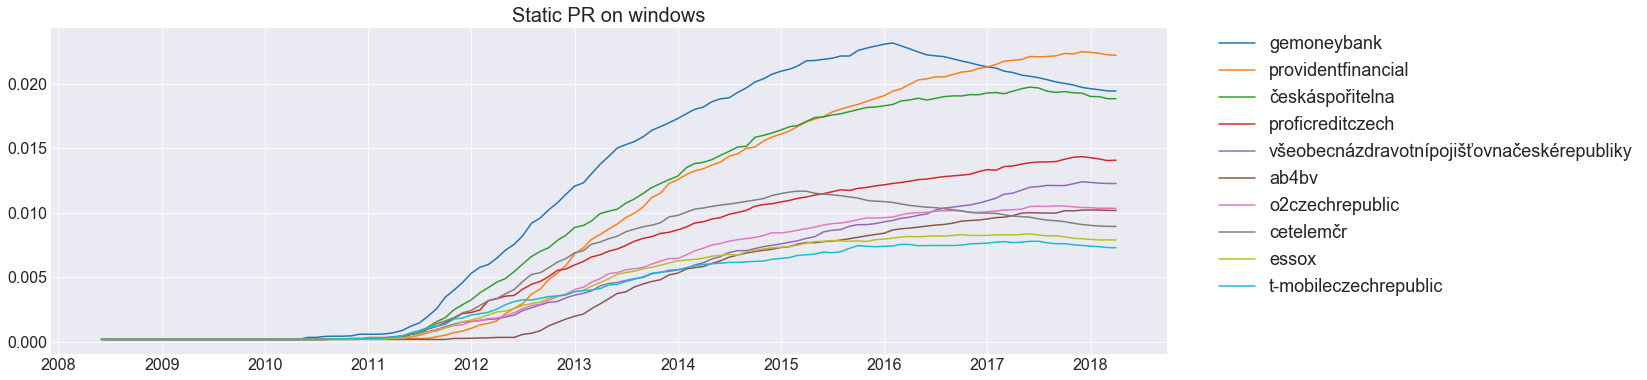

In [8]:
prettify_plot(lambda ax: static_pr_df.loc[top_creditors[0:10]].fillna(0).T.plot(ax=ax, figsize=(20, 6), fontsize=16),
              title="Static PR on windows")

## Evolving PR 1/(t*t)

In [9]:
evolving_quad_pr_df = pd.DataFrame(map(lambda row: dict(row["prEvolvingQuad"]), raw_data), index=index)
evolving_quad_pr_df.columns = map(lambda date_id: dt.date(date_id // 100, date_id % 100, 1), evolving_quad_pr_df.columns)
evolving_quad_pr_df.shape

(5449, 120)

In [10]:
evolving_quad_pr_df = evolving_quad_pr_df.drop(evolving_quad_pr_df.columns[-1], axis=1)

In [11]:
# evolving_quad_pr_df.sum() # in all time windows it should be equal to 1.0

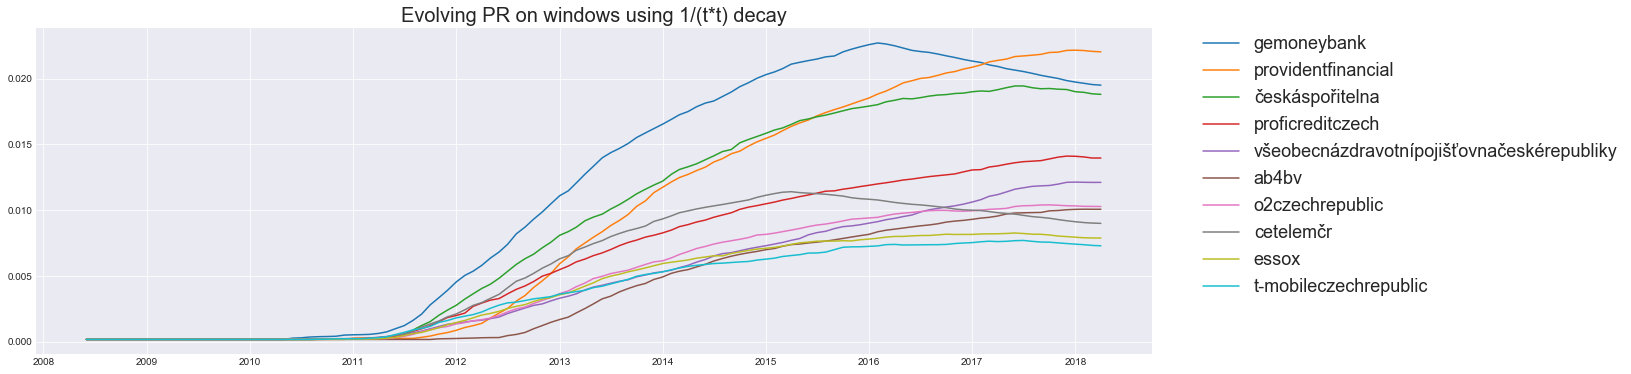

In [12]:
prettify_plot(lambda ax: evolving_quad_pr_df.loc[top_creditors[0:10]].fillna(0).T.plot(ax=ax, figsize=(20, 6)), 
              title="Evolving PR on windows using 1/(t*t) decay")

## Evolving PR 1/t

In [13]:
evolving_pr_df = pd.DataFrame(map(lambda row: dict(row["prEvolving"]), raw_data), index=index)
evolving_pr_df.columns = map(lambda date_id: dt.date(date_id // 100, date_id % 100, 1), evolving_pr_df.columns)
evolving_pr_df.shape

(5449, 120)

In [14]:
evolving_pr_df = evolving_pr_df.drop(evolving_pr_df.columns[-1], axis=1)

In [15]:
# evolving_pr_df.sum() # in all time windows it should be equal to 1.0

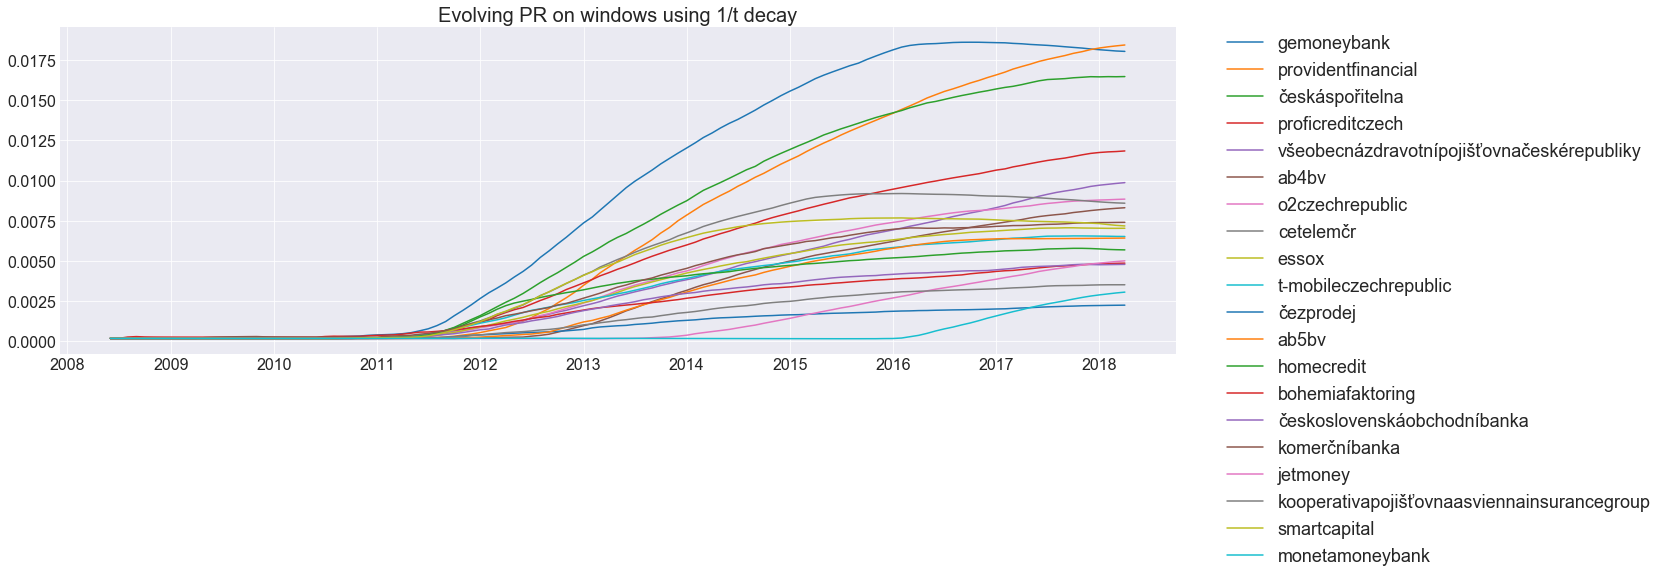

In [19]:
prettify_plot(lambda ax: evolving_pr_df.loc[top_creditors[0:20]].fillna(0).T.plot(ax=ax, figsize=(20, 6), fontsize=16),
              title="Evolving PR on windows using 1/t decay")

# Yearly

## Running experiment

In [6]:
%%bash
./EvolvingPRLargeNetworkYearly.scala

Loading nodes...
Loading edges...
Selecting subgraph Kraj Vysocina
Number of vertices: 152810
Number of edges: 37086
Running PageRank algorithm...
PageRank finished in 33.986 seconds.
Running evolving PageRank algorithm (1/(t*t))...
PageRank finished in 31.424 seconds.
Running evolving PageRank algorithm (1/t)...
PageRank finished in 32.777 seconds.


In [8]:
raw_data = [json.loads(row) for row in open("./data/evolving_pagerank_large_graph_yearly_experiment.jsonline")]
index = np.array(map(lambda row: row["stringId"], raw_data))
node_types = np.array(map(lambda row: row["nodeType"], raw_data))

In [9]:
top_creditors = [u"gemoneybank", u"providentfinancial", u"českáspořitelna", u"proficreditczech", u"všeobecnázdravotnípojišťovnačeskérepubliky", u"ab4bv", 
                 u"o2czechrepublic", u"cetelemčr", u"essox", u"t-mobileczechrepublic", u"čezprodej", u"ab5bv", u"homecredit", u"bohemiafaktoring", 
                 u"československáobchodníbanka", u"komerčníbanka", u"jetmoney", u"kooperativapojišťovnaasviennainsurancegroup", u"smartcapital", u"monetamoneybank"]

## Static PR

In [11]:
static_pr_df = pd.DataFrame(map(lambda row: dict(row["pr"]), raw_data), index=index)
static_pr_df.columns = map(lambda date_id: dt.date(date_id, 1, 1), static_pr_df.columns)
static_pr_df.shape

(5449, 11)

In [13]:
# static_pr_df.sum() # in all time windows it should be equal to 1.0

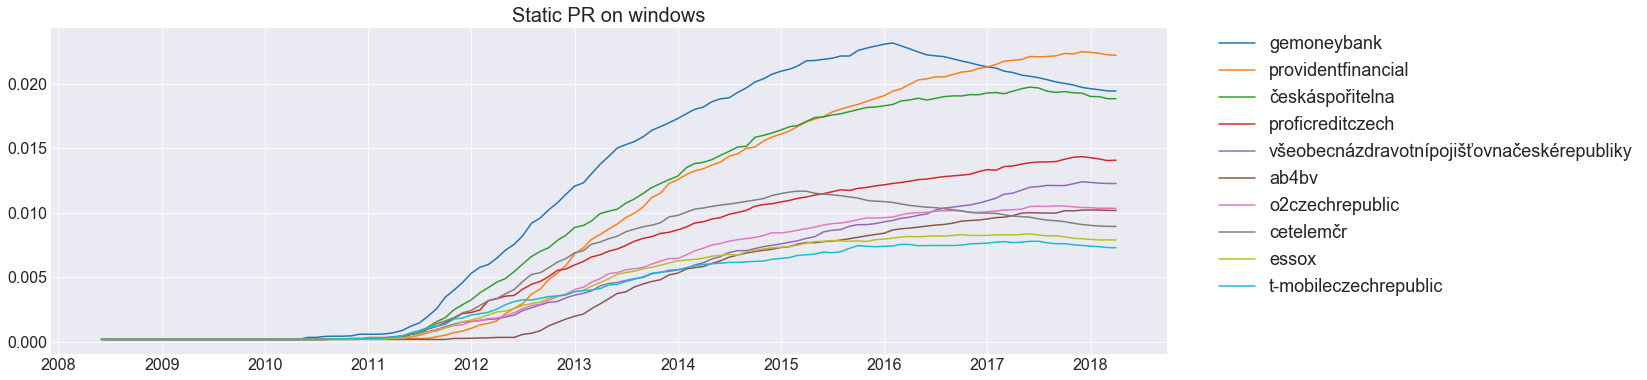

In [55]:
prettify_plot(lambda ax: static_pr_df.loc[top_creditors[0:10]].fillna(0).T.plot(ax=ax, figsize=(20, 6), fontsize=16),
              title="Static PR on windows")

## Evolving PR 1/(t*t)

In [16]:
evolving_quad_pr_df = pd.DataFrame(map(lambda row: dict(row["prEvolvingQuad"]), raw_data), index=index)
evolving_quad_pr_df.columns = map(lambda date_id: dt.date(date_id, 1, 1), evolving_quad_pr_df.columns)
evolving_quad_pr_df.shape

(5449, 11)

In [18]:
# evolving_quad_pr_df.sum() # in all time windows it should be equal to 1.0

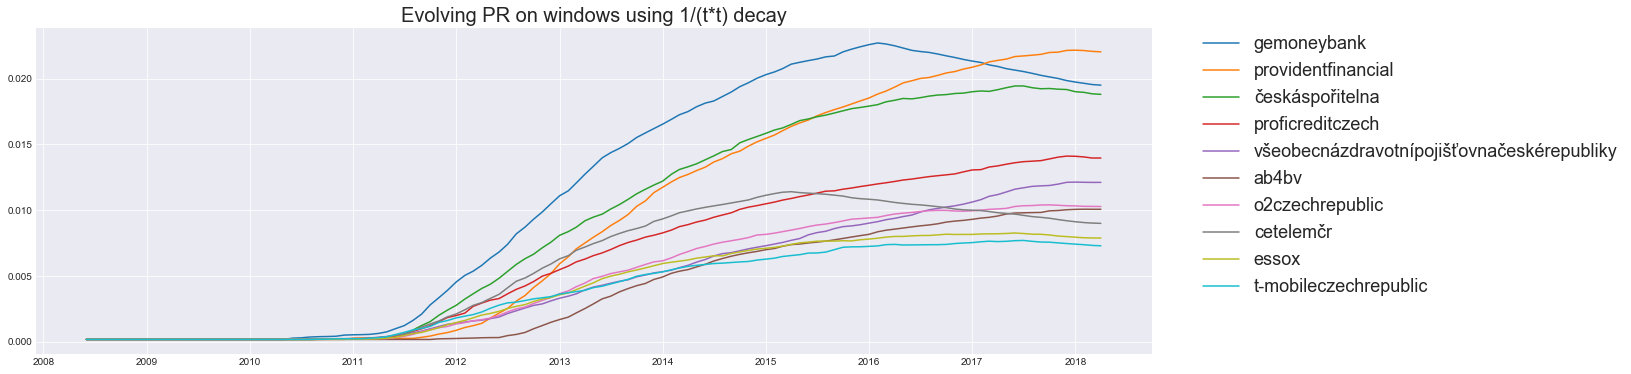

In [53]:
prettify_plot(lambda ax: evolving_quad_pr_df.loc[top_creditors[0:10]].fillna(0).T.plot(ax=ax, figsize=(20, 6)), 
              title="Evolving PR on windows using 1/(t*t) decay")

## Evolving PR 1/t

In [20]:
evolving_pr_df = pd.DataFrame(map(lambda row: dict(row["prEvolving"]), raw_data), index=index)
evolving_pr_df.columns = map(lambda date_id: dt.date(date_id, 1, 1), evolving_pr_df.columns)
evolving_pr_df.shape

(5449, 11)

In [23]:
# evolving_pr_df.sum() # in all time windows it should be equal to 1.0

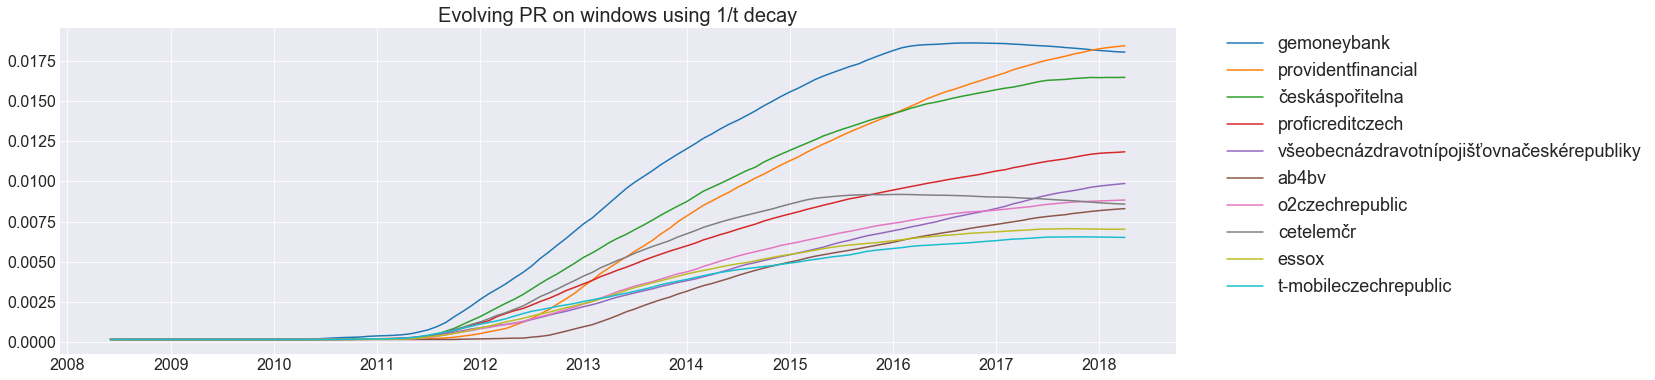

In [52]:
prettify_plot(lambda ax: evolving_pr_df.loc[top_creditors[0:10]].fillna(0).T.plot(ax=ax, figsize=(20, 6), fontsize=16),
              title="Evolving PR on windows using 1/t decay")